In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#creating new data frame just to have all data analyst jobs
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()


c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


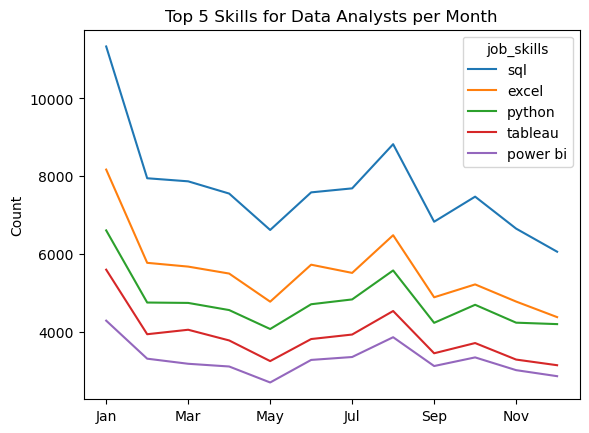

In [2]:
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum() #for adding the new row we used .loc[] inside we provide the name of row. 
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index] #we are useing the total row for sorting values in highest to lowest.
df_DA_pivot = df_DA_pivot.drop('Total') #we are droping the total row because we created just to havae data in order. 

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index() #we are resettign the index so we can have the job posted month in the columns, which can used to convert into txt type month name
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month') #again we are making job posted month as index after we go the month in text format
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no') # we are droping that month number coloumns we don't need it now. or else it will also get plotted.

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line') #we are taking just five columns

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()


In [3]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


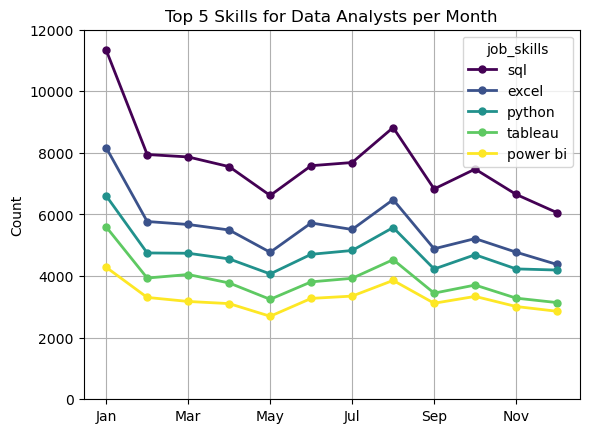

In [4]:
#lets make it customization

#we will be adjusting the parameters. 

df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=2,
    linestyle='-', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=10,
    marker='.', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    # figsize=(10, 5)
)

plt.grid(True)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylim(0, 12000)
plt.ylabel('Count')
plt.xlabel('')
plt.show()


In [6]:
#you can do for all kind of the charts. Dont memorize it use Chatgpt for this.

In [8]:
# Customizing our Scatter plot from 15_Scatter_Plot.ipynb
# Let's now customize the scatter plot from the last exercise.


# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)



In [9]:
skill_stats


,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


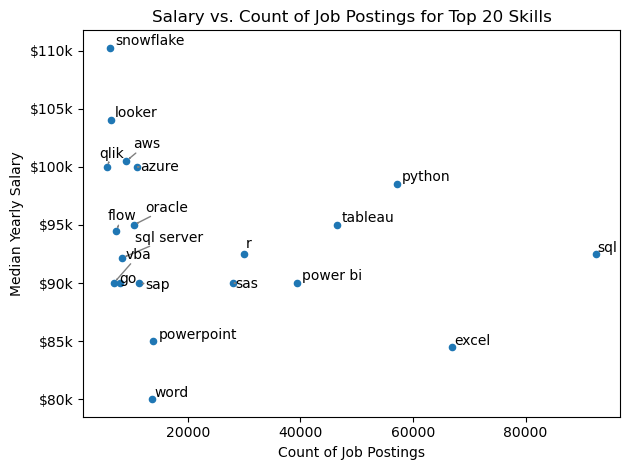

In [10]:
from matplotlib import ticker
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
 
texts = []
for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))
#this for loop plot the name of the skills and thats what we need to adjust so we can use empty list and append in then use in adjust text argument.
#which takes list as input parameter 
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray')) #to avoid text over lapping. you need to create the empty list then append the values in it by wrapping the values inside the for loop.

   #now we need to add arrows to even further clarification. # arrowprops=dict(arrowstyle='->', color='gray') this how you do it.


#CUSTOMIZING THE Y AXIS. WE WILL MAKE LIKE 100K, 85K LIKE THAT SO IT IS MORE REPRESENTATIVE
#We want the y axis like 100k, 50k. FOr that we will need to import ticker from the matplotlib library
# we need to make the one funcion to do the changes in the axis because we will be using 
 # this ax.yaxis.set_major_formatter(plt.FuncFormatter(axis_change)) and inside it you see axis change that is user define function. we are going
 #to create one

def axis_change(y,_):# remember to change axis you need to give 2 input argument to work
    return f'${round(y/1000)}k' #for the return we will devide y axis values 1000 and round it off to get whole num. then we used f string and we put $ and k so 
                                   #so the number will look like $100k
# we need to call out axis
ax = plt.gca() #we need to do this or you can't set axis 
ax.yaxis.set_major_formatter(plt.FuncFormatter(axis_change)) # this is the syntax

#you can also do that with lambada function
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${round(y/1000)}k')) #here we use y and for 2nd argumnet we just use pos. then as in
#lambada after : we write what we want to do with the values.



plt.tight_layout()
plt.show()


In [11]:
# Set Major Formatter
# Notes
# set_major_formatter(): Set the formatter for the major ticker of the default or specified axis.
# Common arguments:
# formatter: The formatter object used for major ticks. Can be from matplotlib.ticker.
# Example
# For our example let's use set_major_formatter to re-format the y-axis. So the 1000s show up as $1k for instance.

# How does this work?

# ax.yaxis.set_major_formatter(): Assigns a custom formatter to the major tick labels on the y-axis.
# plt.FuncFormatter(): Initializes a formatter that uses a user-defined function to format tick labels.
# lambda y, _: An anonymous function that takes two parameters: y (the tick value) and _ (a placeholder for the position, not used here).
# f'${int(y/1000)}K': Formats the tick value y into thousands, appending 'K' and a dollar sign to indicate currency, enhancing readability for large numbers.
